In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Importing necessary libraries


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import re
import string

# Dataset

In [3]:
test_df=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
train_df=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
sample_submission_df=pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission_df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test_df.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [9]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# Observations made from the Dataset

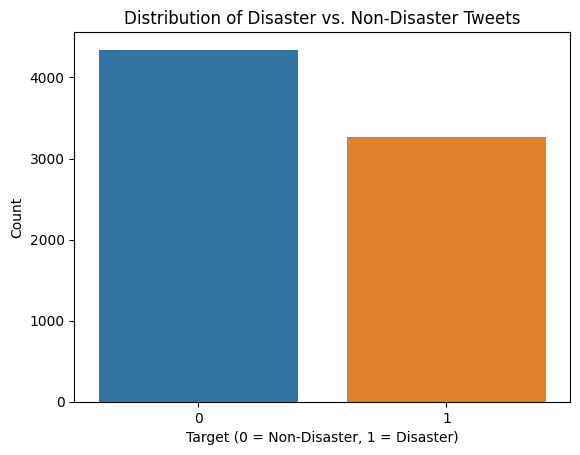

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Count')
plt.show()


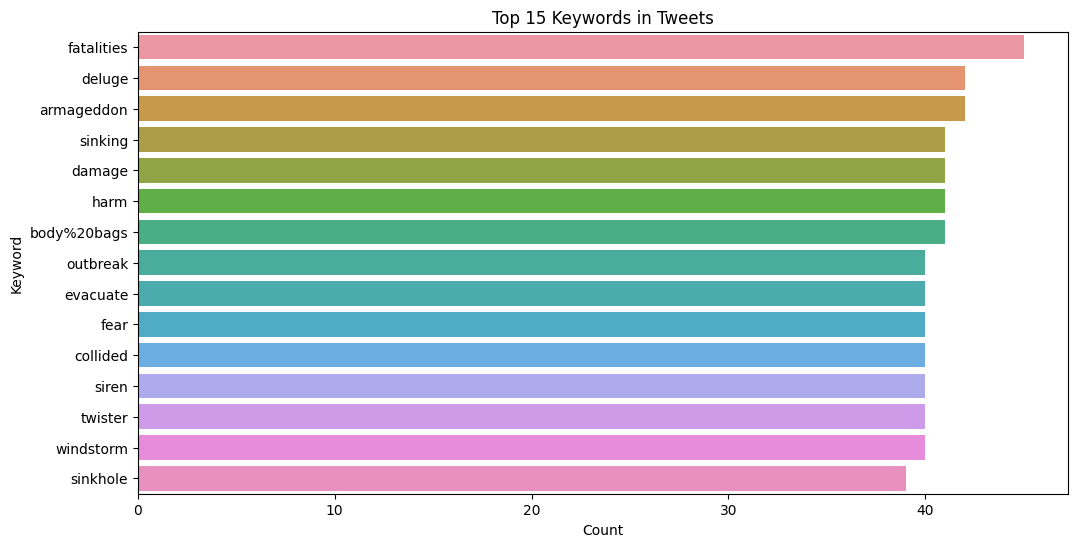

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='keyword', data=train_df, order=train_df['keyword'].value_counts().iloc[:15].index)
plt.title('Top 15 Keywords in Tweets')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


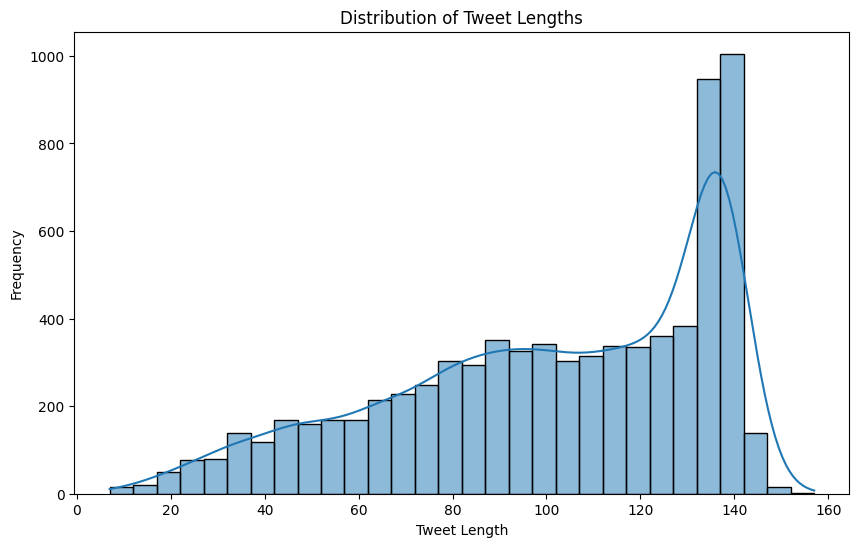

In [12]:
train_df['text_length'] = train_df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


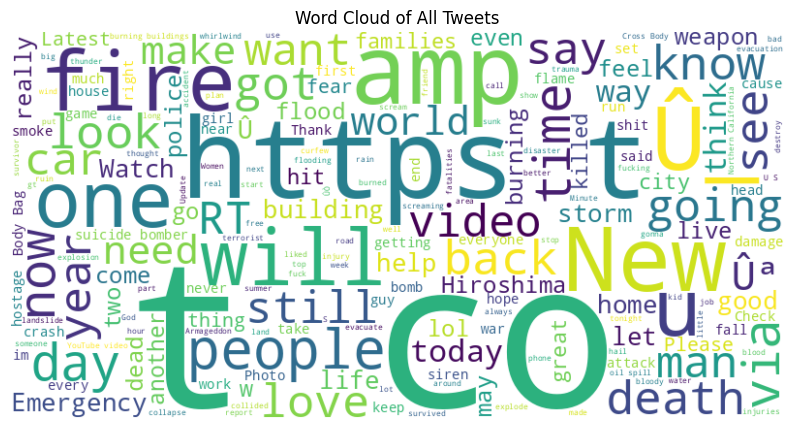

In [13]:
from wordcloud import WordCloud

# Combine all text into one large string
all_words = ' '.join([text for text in train_df['text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


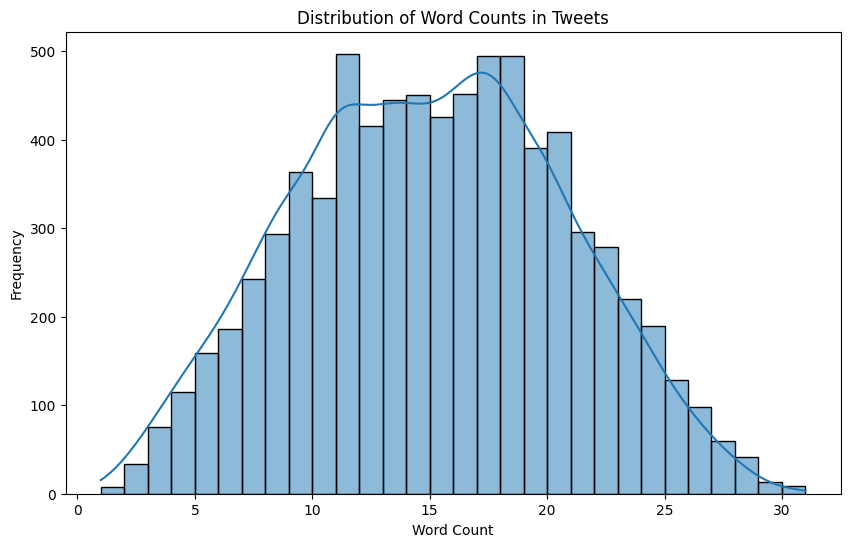

In [14]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


# Exploratory Data Analysis (EDA)

In [15]:
# Check for missing values
print(train_df.isnull().sum())

# Optionally, you can drop rows with missing values or fill them with a placeholder
train_df = train_df.fillna('')  # Fill missing values with an empty string


id                0
keyword          61
location       2533
text              0
target            0
text_length       0
word_count        0
dtype: int64


In [16]:
# Check for missing values
print(test_df.isnull().sum())

# Optionally, you can drop rows with missing values or fill them with a placeholder
test_df = test_df.fillna('')  # Fill missing values with an empty string


id             0
keyword       26
location    1105
text           0
dtype: int64


In [17]:
# Function to clean text data
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = ' '.join(text)
    return text

# Apply text cleaning to train and test sets
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)


In [18]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_df['clean_text'])
X_test_tfidf = tfidf.transform(test_df['clean_text'])

# For simplicity, let's only use the 'clean_text' for now
X = X_train_tfidf
y = train_df['target']


In [19]:
# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.7951411687458962
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.82      0.67      0.73       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.80      0.79      1523



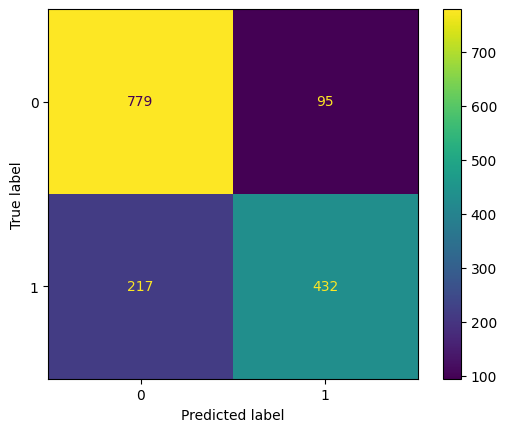

In [20]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [21]:
# Predict on the test set
test_predictions = model.predict(X_test_tfidf)

In [22]:
results = pd.DataFrame({
    'id': test_df['id'],
    'target':test_predictions
})
results.to_csv('submission.csv', index=False)
